In [3]:
import SimpleITK as sitk
import numpy as np
import csv
import os
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np
from skimage import morphology
from skimage import measure
from sklearn.cluster import KMeans
from skimage.transform import resize

In [5]:
def load_data(target):
    names=os.listdir(target)
    x=[]
    for j in names:
            path_final=os.path.join(target,j)
            if j.startswith("lungmask") & j.endswith(".npy"):
                print(path_final)
                x.append(path_final)
    return x

In [14]:
file_list=load_data("/home/atul/major/data_process/")

/home/atul/major/data_process/lungmask_0259_0101.npy
/home/atul/major/data_process/lungmask_0481_0430.npy
/home/atul/major/data_process/lungmask_0009_0937.npy
/home/atul/major/data_process/lungmask_0557_0256.npy
/home/atul/major/data_process/lungmask_0522_1076.npy
/home/atul/major/data_process/lungmask_0371_0222.npy
/home/atul/major/data_process/lungmask_0481_0431.npy
/home/atul/major/data_process/lungmask_0484_0500.npy
/home/atul/major/data_process/lungmask_0428_0993.npy
/home/atul/major/data_process/lungmask_0071_0456.npy
/home/atul/major/data_process/lungmask_0322_0870.npy
/home/atul/major/data_process/lungmask_0459_0142.npy
/home/atul/major/data_process/lungmask_0466_0027.npy
/home/atul/major/data_process/lungmask_0507_0891.npy
/home/atul/major/data_process/lungmask_0419_0943.npy
/home/atul/major/data_process/lungmask_0834_0395.npy
/home/atul/major/data_process/lungmask_0521_1070.npy
/home/atul/major/data_process/lungmask_0662_0583.npy
/home/atul/major/data_process/lungmask_0189_01

In [8]:
file_list_0=load_data("/home/atul/major/data_all/0")
file_list_1=load_data("/home/atul/major/data_all/1")

/home/atul/major/data_all/0/lungmask_0348_47100.npy
/home/atul/major/data_all/0/lungmask_0476_163000.npy
/home/atul/major/data_all/0/lungmask_0144_370100.npy
/home/atul/major/data_all/0/lungmask_0866_415100.npy
/home/atul/major/data_all/0/lungmask_0874_472700.npy
/home/atul/major/data_all/0/lungmask_0554_124100.npy
/home/atul/major/data_all/0/lungmask_0110_72600.npy
/home/atul/major/data_all/0/lungmask_0329_409200.npy
/home/atul/major/data_all/0/lungmask_0050_524400.npy
/home/atul/major/data_all/0/lungmask_0260_61200.npy
/home/atul/major/data_all/0/lungmask_0222_249600.npy
/home/atul/major/data_all/0/lungmask_0651_176800.npy
/home/atul/major/data_all/0/lungmask_0850_298700.npy
/home/atul/major/data_all/0/lungmask_0871_440800.npy
/home/atul/major/data_all/0/lungmask_0065_158700.npy
/home/atul/major/data_all/0/lungmask_0424_439400.npy
/home/atul/major/data_all/0/lungmask_0146_382200.npy
/home/atul/major/data_all/0/lungmask_0471_136900.npy
/home/atul/major/data_all/0/lungmask_0798_454300.

/home/atul/major/data_all/0/lungmask_0423_434200.npy
/home/atul/major/data_all/0/lungmask_0600_417900.npy
/home/atul/major/data_all/0/lungmask_0752_286400.npy
/home/atul/major/data_all/0/lungmask_0495_288500.npy
/home/atul/major/data_all/0/lungmask_0564_144700.npy
/home/atul/major/data_all/0/lungmask_0611_481000.npy
/home/atul/major/data_all/0/lungmask_0089_3700.npy
/home/atul/major/data_all/0/lungmask_0104_486900.npy
/home/atul/major/data_all/0/lungmask_0498_315800.npy
/home/atul/major/data_all/0/lungmask_0860_370700.npy
/home/atul/major/data_all/0/lungmask_0617_540700.npy
/home/atul/major/data_all/0/lungmask_0072_214500.npy
/home/atul/major/data_all/0/lungmask_0475_152000.npy
/home/atul/major/data_all/0/lungmask_0696_483600.npy
/home/atul/major/data_all/0/lungmask_0283_149200.npy
/home/atul/major/data_all/0/lungmask_0398_263500.npy
/home/atul/major/data_all/0/lungmask_0447_1800.npy
/home/atul/major/data_all/0/lungmask_0793_536500.npy
/home/atul/major/data_all/0/lungmask_0741_207900.n

In [15]:
print (len(file_list_0),len(file_list_1),len(file_list))

5499 1351 1186


In [16]:
os.listdir("/home/atul/major/data_process")

['images_0375_0301.npy',
 'images_0536_0016.npy',
 'images_0379_0328.npy',
 'images_0366_0157.npy',
 'lungmask_0259_0101.npy',
 'pos_0752_0648.npy',
 'lungmask_0481_0430.npy',
 'masks_0735_0422.npy',
 'nodule_0175_0104.npy',
 'images_0723_0264.npy',
 'images_0009_0939.npy',
 'images_0152_0440.npy',
 'pos_0114_0605.npy',
 'nodule_0653_0458.npy',
 'images_0165_0726.npy',
 'nodule_0270_0011.npy',
 'pos_0188_0169.npy',
 'nodule_0398_0595.npy',
 'images_0196_0322.npy',
 'nodule_0319_0779.npy',
 'lungmask_0009_0937.npy',
 'images_0411_0837.npy',
 'pos_0710_0919.npy',
 'lungmask_0557_0256.npy',
 'images_0027_0536.npy',
 'nodule_0710_0924.npy',
 'images_0168_0765.npy',
 'nodule_0591_0852.npy',
 'masks_0294_0412.npy',
 'pos_0303_0522.npy',
 'pos_0594_0878.npy',
 'masks_0767_0834.npy',
 'pos_0038_1017.npy',
 'pos_0694_1023.npy',
 'lungmask_0522_1076.npy',
 'masks_0722_0239.npy',
 'nodule_0026_0348.npy',
 'masks_0464_0208.npy',
 'pos_0104_1062.npy',
 'pos_0095_0936.npy',
 'masks_0125_0308.npy',
 

In [20]:
output_path="/home/atul/major/data_all/0"

In [37]:
process(file_list_0)
process(file_list_1)

on image /home/atul/major/data_all/0/images_0671_296000.npy
on image /home/atul/major/data_all/0/images_0163_307500.npy
on image /home/atul/major/data_all/0/images_0058_65700.npy
on image /home/atul/major/data_all/0/images_0229_297200.npy
on image /home/atul/major/data_all/0/images_0405_306100.npy
on image /home/atul/major/data_all/0/images_0036_445900.npy
on image /home/atul/major/data_all/0/images_0140_108800.npy
on image /home/atul/major/data_all/0/images_0270_10100.npy
on image /home/atul/major/data_all/0/images_0661_252500.npy
on image /home/atul/major/data_all/0/images_0480_188200.npy
on image /home/atul/major/data_all/0/images_0881_522200.npy
on image /home/atul/major/data_all/0/images_0249_485600.npy
on image /home/atul/major/data_all/0/images_0294_188400.npy
on image /home/atul/major/data_all/0/images_0601_425300.npy
on image /home/atul/major/data_all/0/images_0032_494000.npy
on image /home/atul/major/data_all/0/images_0044_482000.npy
on image /home/atul/major/data_all/0/image

on image /home/atul/major/data_all/0/images_0201_168400.npy
on image /home/atul/major/data_all/0/images_0198_158600.npy
on image /home/atul/major/data_all/0/images_0776_447200.npy
on image /home/atul/major/data_all/0/images_0458_69900.npy
on image /home/atul/major/data_all/0/images_0465_107100.npy
on image /home/atul/major/data_all/0/images_0281_144100.npy
on image /home/atul/major/data_all/0/images_0706_542500.npy
on image /home/atul/major/data_all/0/images_0248_478400.npy
on image /home/atul/major/data_all/0/images_0345_544600.npy
on image /home/atul/major/data_all/0/images_0574_264900.npy
on image /home/atul/major/data_all/0/images_0055_53400.npy
on image /home/atul/major/data_all/0/images_0645_75300.npy
on image /home/atul/major/data_all/0/images_0006_546700.npy
on image /home/atul/major/data_all/0/images_0250_489200.npy
on image /home/atul/major/data_all/0/images_0588_345400.npy
on image /home/atul/major/data_all/0/images_0213_215800.npy
on image /home/atul/major/data_all/0/images

on image /home/atul/major/data_all/0/images_0198_158400.npy
on image /home/atul/major/data_all/0/images_0383_186100.npy
on image /home/atul/major/data_all/0/images_0669_286100.npy
on image /home/atul/major/data_all/0/images_0327_396500.npy
on image /home/atul/major/data_all/0/images_0001_15100.npy
on image /home/atul/major/data_all/0/images_0438_526400.npy
on image /home/atul/major/data_all/0/images_0548_99200.npy
on image /home/atul/major/data_all/0/images_0693_456400.npy
on image /home/atul/major/data_all/0/images_0305_251800.npy
on image /home/atul/major/data_all/0/images_0773_425600.npy
on image /home/atul/major/data_all/0/images_0610_475500.npy
on image /home/atul/major/data_all/0/images_0467_62800.npy
on image /home/atul/major/data_all/0/images_0675_318100.npy
on image /home/atul/major/data_all/0/images_0822_77600.npy
on image /home/atul/major/data_all/0/images_0794_537700.npy
on image /home/atul/major/data_all/0/images_0171_369000.npy
on image /home/atul/major/data_all/0/images_

on image /home/atul/major/data_all/0/images_0487_252900.npy
on image /home/atul/major/data_all/0/images_0371_111400.npy
on image /home/atul/major/data_all/0/images_0103_483000.npy
on image /home/atul/major/data_all/0/images_0163_306900.npy
on image /home/atul/major/data_all/0/images_0447_2000.npy
on image /home/atul/major/data_all/0/images_0833_177400.npy
on image /home/atul/major/data_all/0/images_0719_100100.npy
on image /home/atul/major/data_all/0/images_0195_140300.npy
on image /home/atul/major/data_all/0/images_0290_143600.npy
on image /home/atul/major/data_all/0/images_0381_166000.npy
on image /home/atul/major/data_all/0/images_0715_58700.npy
on image /home/atul/major/data_all/0/images_0850_298800.npy
on image /home/atul/major/data_all/0/images_0495_288900.npy
on image /home/atul/major/data_all/0/images_0746_257100.npy
on image /home/atul/major/data_all/0/images_0624_8700.npy
on image /home/atul/major/data_all/0/images_0675_318200.npy
on image /home/atul/major/data_all/0/images_0

on image /home/atul/major/data_all/0/images_0465_107000.npy
on image /home/atul/major/data_all/0/images_0289_85600.npy
on image /home/atul/major/data_all/0/images_0716_66100.npy
on image /home/atul/major/data_all/0/images_0866_415300.npy
on image /home/atul/major/data_all/0/images_0523_499400.npy
on image /home/atul/major/data_all/0/images_0290_143500.npy
on image /home/atul/major/data_all/0/images_0082_309800.npy
on image /home/atul/major/data_all/0/images_0861_374900.npy
on image /home/atul/major/data_all/0/images_0566_167100.npy
on image /home/atul/major/data_all/0/images_0434_512400.npy
on image /home/atul/major/data_all/0/images_0351_64100.npy
on image /home/atul/major/data_all/0/images_0479_186900.npy
on image /home/atul/major/data_all/0/images_0664_270900.npy
on image /home/atul/major/data_all/0/images_0481_196500.npy
on image /home/atul/major/data_all/0/images_0554_124100.npy
on image /home/atul/major/data_all/0/images_0331_420800.npy
on image /home/atul/major/data_all/0/images

on image /home/atul/major/data_all/0/images_0475_152400.npy
on image /home/atul/major/data_all/0/images_0055_53700.npy
on image /home/atul/major/data_all/0/images_0710_400700.npy
on image /home/atul/major/data_all/0/images_0375_142500.npy
on image /home/atul/major/data_all/0/images_0174_37500.npy
on image /home/atul/major/data_all/0/images_0294_188800.npy
on image /home/atul/major/data_all/0/images_0805_37000.npy
on image /home/atul/major/data_all/0/images_0340_492300.npy
on image /home/atul/major/data_all/0/images_0569_247500.npy
on image /home/atul/major/data_all/0/images_0805_36600.npy
on image /home/atul/major/data_all/0/images_0726_155100.npy
on image /home/atul/major/data_all/0/images_0583_320100.npy
on image /home/atul/major/data_all/0/images_0687_393000.npy
on image /home/atul/major/data_all/0/images_0029_342700.npy
on image /home/atul/major/data_all/0/images_0562_134200.npy
on image /home/atul/major/data_all/0/images_0484_221500.npy
on image /home/atul/major/data_all/0/images_

on image /home/atul/major/data_all/0/images_0668_278500.npy
on image /home/atul/major/data_all/0/images_0335_458400.npy
on image /home/atul/major/data_all/0/images_0473_140900.npy
on image /home/atul/major/data_all/0/images_0100_459300.npy
on image /home/atul/major/data_all/0/images_0447_1200.npy
on image /home/atul/major/data_all/0/images_0668_278200.npy
on image /home/atul/major/data_all/0/images_0621_403800.npy
on image /home/atul/major/data_all/0/images_0605_451100.npy
on image /home/atul/major/data_all/0/images_0385_191900.npy
on image /home/atul/major/data_all/0/images_0558_184900.npy
on image /home/atul/major/data_all/0/images_0124_545200.npy
on image /home/atul/major/data_all/0/images_0026_163200.npy
on image /home/atul/major/data_all/0/images_0641_118900.npy
on image /home/atul/major/data_all/0/images_0305_251200.npy
on image /home/atul/major/data_all/0/images_0056_56700.npy
on image /home/atul/major/data_all/0/images_0844_241900.npy
on image /home/atul/major/data_all/0/images

on image /home/atul/major/data_all/0/images_0168_333100.npy
on image /home/atul/major/data_all/0/images_0648_148300.npy
on image /home/atul/major/data_all/0/images_0471_136800.npy
on image /home/atul/major/data_all/0/images_0323_381500.npy
on image /home/atul/major/data_all/0/images_0650_159900.npy
on image /home/atul/major/data_all/0/images_0275_101300.npy
on image /home/atul/major/data_all/0/images_0663_266200.npy
on image /home/atul/major/data_all/0/images_0761_343700.npy
on image /home/atul/major/data_all/0/images_0358_7400.npy
on image /home/atul/major/data_all/0/images_0170_365700.npy
on image /home/atul/major/data_all/0/images_0874_472900.npy
on image /home/atul/major/data_all/0/images_0188_89400.npy
on image /home/atul/major/data_all/0/images_0491_265400.npy
on image /home/atul/major/data_all/0/images_0832_174600.npy
on image /home/atul/major/data_all/0/images_0250_489100.npy
on image /home/atul/major/data_all/0/images_0279_127100.npy
on image /home/atul/major/data_all/0/images

on image /home/atul/major/data_all/0/images_0504_355800.npy
on image /home/atul/major/data_all/0/images_0482_197000.npy
on image /home/atul/major/data_all/0/images_0495_288400.npy
on image /home/atul/major/data_all/0/images_0164_313500.npy
on image /home/atul/major/data_all/0/images_0787_509600.npy
on image /home/atul/major/data_all/0/images_0114_269500.npy
on image /home/atul/major/data_all/0/images_0109_19400.npy
on image /home/atul/major/data_all/0/images_0801_6800.npy
on image /home/atul/major/data_all/0/images_0463_97700.npy
on image /home/atul/major/data_all/0/images_0379_157000.npy
on image /home/atul/major/data_all/0/images_0624_9000.npy
on image /home/atul/major/data_all/0/images_0708_300200.npy
on image /home/atul/major/data_all/0/images_0390_205200.npy
on image /home/atul/major/data_all/0/images_0247_465900.npy
on image /home/atul/major/data_all/0/images_0171_368900.npy
on image /home/atul/major/data_all/0/images_0629_29300.npy
on image /home/atul/major/data_all/0/images_039

on image /home/atul/major/data_all/0/images_0315_314900.npy
on image /home/atul/major/data_all/0/images_0243_443800.npy
on image /home/atul/major/data_all/0/images_0172_24900.npy
on image /home/atul/major/data_all/0/images_0793_535700.npy
on image /home/atul/major/data_all/0/images_0008_408800.npy
on image /home/atul/major/data_all/0/images_0824_176000.npy
on image /home/atul/major/data_all/0/images_0494_287900.npy
on image /home/atul/major/data_all/0/images_0387_198000.npy
on image /home/atul/major/data_all/0/images_0248_478200.npy
on image /home/atul/major/data_all/0/images_0460_74500.npy
on image /home/atul/major/data_all/0/images_0236_328600.npy
on image /home/atul/major/data_all/0/images_0188_89500.npy
on image /home/atul/major/data_all/0/images_0177_61300.npy
on image /home/atul/major/data_all/0/images_0075_243600.npy
on image /home/atul/major/data_all/0/images_0849_297800.npy
on image /home/atul/major/data_all/0/images_0651_176500.npy
on image /home/atul/major/data_all/0/images_

on image /home/atul/major/data_all/0/images_0093_399800.npy
on image /home/atul/major/data_all/0/images_0580_284300.npy
on image /home/atul/major/data_all/0/images_0570_247600.npy
on image /home/atul/major/data_all/0/images_0144_370000.npy
on image /home/atul/major/data_all/0/images_0746_257900.npy
on image /home/atul/major/data_all/0/images_0059_70800.npy
on image /home/atul/major/data_all/0/images_0815_94100.npy
on image /home/atul/major/data_all/0/images_0262_71300.npy
on image /home/atul/major/data_all/0/images_0179_3600.npy
on image /home/atul/major/data_all/0/images_0853_330100.npy
on image /home/atul/major/data_all/0/images_0264_349300.npy
on image /home/atul/major/data_all/0/images_0674_313000.npy
on image /home/atul/major/data_all/0/images_0770_397200.npy
on image /home/atul/major/data_all/0/images_0432_510400.npy
on image /home/atul/major/data_all/0/images_0534_269600.npy
on image /home/atul/major/data_all/0/images_0326_394000.npy
on image /home/atul/major/data_all/0/images_0

on image /home/atul/major/data_all/0/images_0655_221700.npy
on image /home/atul/major/data_all/0/images_0566_167200.npy
on image /home/atul/major/data_all/0/images_0772_421400.npy
on image /home/atul/major/data_all/0/images_0581_299500.npy
on image /home/atul/major/data_all/0/images_0057_63600.npy
on image /home/atul/major/data_all/0/images_0063_87600.npy
on image /home/atul/major/data_all/0/images_0580_284100.npy
on image /home/atul/major/data_all/0/images_0538_31900.npy
on image /home/atul/major/data_all/0/images_0669_285900.npy
on image /home/atul/major/data_all/0/images_0145_372600.npy
on image /home/atul/major/data_all/0/images_0608_467800.npy
on image /home/atul/major/data_all/0/images_0002_17200.npy
on image /home/atul/major/data_all/0/images_0447_1900.npy
on image /home/atul/major/data_all/0/images_0760_334800.npy
on image /home/atul/major/data_all/0/images_0867_423500.npy
on image /home/atul/major/data_all/0/images_0863_401800.npy
on image /home/atul/major/data_all/0/images_01

on image /home/atul/major/data_all/0/images_0114_269400.npy
on image /home/atul/major/data_all/0/images_0783_487600.npy
on image /home/atul/major/data_all/0/images_0775_432500.npy
on image /home/atul/major/data_all/0/images_0745_255200.npy
on image /home/atul/major/data_all/0/images_0225_279300.npy
on image /home/atul/major/data_all/0/images_0198_158200.npy
on image /home/atul/major/data_all/0/images_0871_440900.npy
on image /home/atul/major/data_all/0/images_0879_505300.npy
on image /home/atul/major/data_all/0/images_0679_340500.npy
on image /home/atul/major/data_all/0/images_0645_74900.npy
on image /home/atul/major/data_all/0/images_0591_371600.npy
on image /home/atul/major/data_all/0/images_0210_207300.npy
on image /home/atul/major/data_all/0/images_0318_321300.npy
on image /home/atul/major/data_all/0/images_0105_488900.npy
on image /home/atul/major/data_all/0/images_0028_319400.npy
on image /home/atul/major/data_all/0/images_0525_521400.npy
on image /home/atul/major/data_all/0/imag

on image /home/atul/major/data_all/0/images_0777_456600.npy
on image /home/atul/major/data_all/0/images_0735_194300.npy
on image /home/atul/major/data_all/0/images_0256_537000.npy
on image /home/atul/major/data_all/0/images_0378_88800.npy
on image /home/atul/major/data_all/0/images_0423_433700.npy
on image /home/atul/major/data_all/0/images_0231_305500.npy
on image /home/atul/major/data_all/0/images_0724_138000.npy
on image /home/atul/major/data_all/0/images_0074_222500.npy
on image /home/atul/major/data_all/0/images_0279_127400.npy
on image /home/atul/major/data_all/0/images_0206_180700.npy
on image /home/atul/major/data_all/0/images_0872_442700.npy
on image /home/atul/major/data_all/0/images_0409_359300.npy
on image /home/atul/major/data_all/0/images_0616_525000.npy
on image /home/atul/major/data_all/0/images_0417_404900.npy
on image /home/atul/major/data_all/0/images_0717_92600.npy
on image /home/atul/major/data_all/0/images_0614_496400.npy
on image /home/atul/major/data_all/0/image

on image /home/atul/major/data_all/0/images_0647_227900.npy
on image /home/atul/major/data_all/0/images_0459_70200.npy
on image /home/atul/major/data_all/0/images_0762_347900.npy
on image /home/atul/major/data_all/0/images_0565_151100.npy
on image /home/atul/major/data_all/0/images_0663_266300.npy
on image /home/atul/major/data_all/0/images_0502_344500.npy
on image /home/atul/major/data_all/0/images_0082_309900.npy
on image /home/atul/major/data_all/0/images_0086_340000.npy
on image /home/atul/major/data_all/0/images_0792_527900.npy
on image /home/atul/major/data_all/0/images_0025_66700.npy
on image /home/atul/major/data_all/0/images_0685_385200.npy
on image /home/atul/major/data_all/0/images_0247_466700.npy
on image /home/atul/major/data_all/0/images_0339_478700.npy
on image /home/atul/major/data_all/0/images_0815_94500.npy
on image /home/atul/major/data_all/0/images_0407_332900.npy
on image /home/atul/major/data_all/0/images_0466_18800.npy
on image /home/atul/major/data_all/0/images_

on image /home/atul/major/data_all/0/images_0615_515200.npy
on image /home/atul/major/data_all/0/images_0677_322900.npy
on image /home/atul/major/data_all/0/images_0427_445000.npy
on image /home/atul/major/data_all/0/images_0327_396000.npy
on image /home/atul/major/data_all/0/images_0069_191000.npy
on image /home/atul/major/data_all/0/images_0442_377000.npy
on image /home/atul/major/data_all/0/images_0808_54900.npy
on image /home/atul/major/data_all/0/images_0483_220300.npy
on image /home/atul/major/data_all/0/images_0690_419600.npy
on image /home/atul/major/data_all/0/images_0010_431100.npy
on image /home/atul/major/data_all/0/images_0566_167300.npy
on image /home/atul/major/data_all/0/images_0556_95100.npy
on image /home/atul/major/data_all/0/images_0304_238700.npy
on image /home/atul/major/data_all/0/images_0018_379300.npy
on image /home/atul/major/data_all/0/images_0103_483300.npy
on image /home/atul/major/data_all/0/images_0532_411100.npy
on image /home/atul/major/data_all/0/image

on image /home/atul/major/data_all/0/images_0245_452500.npy
on image /home/atul/major/data_all/0/images_0397_260300.npy
on image /home/atul/major/data_all/0/images_0837_211600.npy
on image /home/atul/major/data_all/0/images_0330_414200.npy
on image /home/atul/major/data_all/0/images_0315_315200.npy
on image /home/atul/major/data_all/0/images_0217_228800.npy
on image /home/atul/major/data_all/0/images_0037_463500.npy
on image /home/atul/major/data_all/0/images_0747_266900.npy
on image /home/atul/major/data_all/0/images_0005_531400.npy
on image /home/atul/major/data_all/0/images_0139_97500.npy
on image /home/atul/major/data_all/0/images_0213_215200.npy
on image /home/atul/major/data_all/0/images_0726_155000.npy
on image /home/atul/major/data_all/0/images_0331_421000.npy
on image /home/atul/major/data_all/0/images_0442_377300.npy
on image /home/atul/major/data_all/0/images_0326_393400.npy
on image /home/atul/major/data_all/0/images_0248_478300.npy
on image /home/atul/major/data_all/0/imag

on image /home/atul/major/data_all/0/images_0524_501800.npy
on image /home/atul/major/data_all/0/images_0870_430100.npy
on image /home/atul/major/data_all/0/images_0632_55400.npy
on image /home/atul/major/data_all/0/images_0194_130600.npy
on image /home/atul/major/data_all/0/images_0815_94300.npy
on image /home/atul/major/data_all/0/images_0382_179800.npy
on image /home/atul/major/data_all/0/images_0346_546500.npy
on image /home/atul/major/data_all/0/images_0440_532500.npy
on image /home/atul/major/data_all/0/images_0880_507100.npy
on image /home/atul/major/data_all/0/images_0882_535100.npy
on image /home/atul/major/data_all/0/images_0380_203800.npy
on image /home/atul/major/data_all/0/images_0624_9200.npy
on image /home/atul/major/data_all/0/images_0218_231700.npy
on image /home/atul/major/data_all/0/images_0056_57400.npy
on image /home/atul/major/data_all/0/images_0875_493000.npy
on image /home/atul/major/data_all/0/images_0382_179600.npy
on image /home/atul/major/data_all/0/images_0

on image /home/atul/major/data_all/0/images_0744_230800.npy
on image /home/atul/major/data_all/0/images_0495_289500.npy
on image /home/atul/major/data_all/0/images_0606_451300.npy
on image /home/atul/major/data_all/0/images_0882_535400.npy
on image /home/atul/major/data_all/0/images_0008_408900.npy
on image /home/atul/major/data_all/0/images_0802_17300.npy
on image /home/atul/major/data_all/0/images_0484_221200.npy
on image /home/atul/major/data_all/0/images_0337_474200.npy
on image /home/atul/major/data_all/0/images_0375_142400.npy
on image /home/atul/major/data_all/0/images_0252_498600.npy
on image /home/atul/major/data_all/0/images_0157_243200.npy
on image /home/atul/major/data_all/0/images_0418_409000.npy
on image /home/atul/major/data_all/0/images_0852_311500.npy
on image /home/atul/major/data_all/0/images_0257_538900.npy
on image /home/atul/major/data_all/0/images_0719_99700.npy
on image /home/atul/major/data_all/0/images_0214_223300.npy
on image /home/atul/major/data_all/0/image

on image /home/atul/major/data_all/0/images_0467_63100.npy
on image /home/atul/major/data_all/0/images_0435_513100.npy
on image /home/atul/major/data_all/0/images_0024_39900.npy
on image /home/atul/major/data_all/0/images_0508_395000.npy
on image /home/atul/major/data_all/0/images_0828_164100.npy
on image /home/atul/major/data_all/0/images_0762_347700.npy
on image /home/atul/major/data_all/0/images_0755_308800.npy
on image /home/atul/major/data_all/0/images_0488_254600.npy
on image /home/atul/major/data_all/0/images_0242_398900.npy
on image /home/atul/major/data_all/0/images_0670_294100.npy
on image /home/atul/major/data_all/0/images_0174_37600.npy
on image /home/atul/major/data_all/0/images_0516_436700.npy
on image /home/atul/major/data_all/0/images_0606_451800.npy
on image /home/atul/major/data_all/0/images_0368_85300.npy
on image /home/atul/major/data_all/0/images_0771_413100.npy
on image /home/atul/major/data_all/0/images_0180_5900.npy
on image /home/atul/major/data_all/0/images_04

on image /home/atul/major/data_all/0/images_0114_269300.npy
on image /home/atul/major/data_all/0/images_0787_509800.npy
on image /home/atul/major/data_all/0/images_0831_172000.npy
on image /home/atul/major/data_all/0/images_0315_314600.npy
on image /home/atul/major/data_all/0/images_0085_326400.npy
on image /home/atul/major/data_all/0/images_0672_308400.npy
on image /home/atul/major/data_all/0/images_0527_534000.npy
on image /home/atul/major/data_all/0/images_0490_265200.npy
on image /home/atul/major/data_all/0/images_0128_155600.npy
on image /home/atul/major/data_all/0/images_0682_362400.npy
on image /home/atul/major/data_all/0/images_0152_199600.npy
on image /home/atul/major/data_all/0/images_0216_227400.npy
on image /home/atul/major/data_all/0/images_0202_79700.npy
on image /home/atul/major/data_all/0/images_0469_166400.npy
on image /home/atul/major/data_all/0/images_0006_547300.npy
on image /home/atul/major/data_all/0/images_0029_342800.npy
on image /home/atul/major/data_all/0/imag

on image /home/atul/major/data_all/0/images_0563_139300.npy
on image /home/atul/major/data_all/0/images_0264_349500.npy
on image /home/atul/major/data_all/0/images_0792_528300.npy
on image /home/atul/major/data_all/0/images_0288_178200.npy
on image /home/atul/major/data_all/0/images_0485_228200.npy
on image /home/atul/major/data_all/0/images_0727_161000.npy
on image /home/atul/major/data_all/0/images_0844_242000.npy
on image /home/atul/major/data_all/0/images_0533_460600.npy
on image /home/atul/major/data_all/0/images_0443_427600.npy
on image /home/atul/major/data_all/0/images_0646_135900.npy
on image /home/atul/major/data_all/0/images_0857_354700.npy
on image /home/atul/major/data_all/0/images_0357_2200.npy
on image /home/atul/major/data_all/0/images_0601_425000.npy
on image /home/atul/major/data_all/0/images_0054_50900.npy
on image /home/atul/major/data_all/0/images_0130_120800.npy
on image /home/atul/major/data_all/0/images_0621_403300.npy
on image /home/atul/major/data_all/0/images

on image /home/atul/major/data_all/0/images_0829_165800.npy
on image /home/atul/major/data_all/0/images_0376_146500.npy
on image /home/atul/major/data_all/0/images_0096_412800.npy
on image /home/atul/major/data_all/0/images_0253_508700.npy
on image /home/atul/major/data_all/0/images_0393_218300.npy
on image /home/atul/major/data_all/0/images_0222_249500.npy
on image /home/atul/major/data_all/0/images_0809_62100.npy
on image /home/atul/major/data_all/0/images_0192_104800.npy
on image /home/atul/major/data_all/0/images_0572_255900.npy
on image /home/atul/major/data_all/0/images_0152_199700.npy
on image /home/atul/major/data_all/0/images_0045_494400.npy
on image /home/atul/major/data_all/0/images_0383_186700.npy
on image /home/atul/major/data_all/0/images_0746_257000.npy
on image /home/atul/major/data_all/0/images_0496_294800.npy
on image /home/atul/major/data_all/0/images_0060_73300.npy
on image /home/atul/major/data_all/0/images_0512_418100.npy
on image /home/atul/major/data_all/0/image

on image /home/atul/major/data_all/0/images_0190_102700.npy
on image /home/atul/major/data_all/0/images_0826_151000.npy
on image /home/atul/major/data_all/0/images_0670_294000.npy
on image /home/atul/major/data_all/0/images_0007_548200.npy
on image /home/atul/major/data_all/0/images_0435_513000.npy
on image /home/atul/major/data_all/0/images_0843_240200.npy
on image /home/atul/major/data_all/0/images_0360_14200.npy
on image /home/atul/major/data_all/0/images_0512_418500.npy
on image /home/atul/major/data_all/0/images_0143_112900.npy
on image /home/atul/major/data_all/0/images_0872_443200.npy
on image /home/atul/major/data_all/0/images_0562_134100.npy
on image /home/atul/major/data_all/0/images_0494_287600.npy
on image /home/atul/major/data_all/0/images_0478_172500.npy
on image /home/atul/major/data_all/0/images_0392_212300.npy
on image /home/atul/major/data_all/0/images_0576_276400.npy
on image /home/atul/major/data_all/0/images_0013_359000.npy
on image /home/atul/major/data_all/0/imag

on image /home/atul/major/data_all/0/images_0495_288700.npy
on image /home/atul/major/data_all/0/images_0572_255700.npy
on image /home/atul/major/data_all/0/images_0803_22100.npy
on image /home/atul/major/data_all/0/images_0852_312400.npy
on image /home/atul/major/data_all/0/images_0443_427400.npy
on image /home/atul/major/data_all/0/images_0269_4800.npy
on image /home/atul/major/data_all/0/images_0098_447700.npy
on image /home/atul/major/data_all/0/images_0859_363200.npy
on image /home/atul/major/data_all/0/images_0386_196200.npy
on image /home/atul/major/data_all/0/images_0456_59500.npy
on image /home/atul/major/data_all/0/images_0857_354500.npy
on image /home/atul/major/data_all/0/images_0459_70400.npy
on image /home/atul/major/data_all/0/images_0581_299600.npy
on image /home/atul/major/data_all/0/images_0796_337600.npy
on image /home/atul/major/data_all/0/images_0651_176800.npy
on image /home/atul/major/data_all/0/images_0024_40000.npy
on image /home/atul/major/data_all/0/images_07

on image /home/atul/major/data_all/0/images_0884_292000.npy
on image /home/atul/major/data_all/0/images_0200_166800.npy
on image /home/atul/major/data_all/0/images_0252_498400.npy
on image /home/atul/major/data_all/0/images_0676_322000.npy
on image /home/atul/major/data_all/0/images_0353_388800.npy
on image /home/atul/major/data_all/0/images_0508_394900.npy
on image /home/atul/major/data_all/0/images_0746_257200.npy
on image /home/atul/major/data_all/0/images_0445_238000.npy
on image /home/atul/major/data_all/0/images_0550_109100.npy
on image /home/atul/major/data_all/0/images_0117_514200.npy
on image /home/atul/major/data_all/0/images_0266_514400.npy
on image /home/atul/major/data_all/0/images_0060_73700.npy
on image /home/atul/major/data_all/0/images_0298_194700.npy
on image /home/atul/major/data_all/0/images_0634_58300.npy
on image /home/atul/major/data_all/0/images_0854_336300.npy
on image /home/atul/major/data_all/0/images_0439_529600.npy
on image /home/atul/major/data_all/0/image

on image /home/atul/major/data_all/0/images_0307_262800.npy
on image /home/atul/major/data_all/0/images_0634_58100.npy
on image /home/atul/major/data_all/0/images_0747_266700.npy
on image /home/atul/major/data_all/0/images_0821_35000.npy
on image /home/atul/major/data_all/0/images_0488_254300.npy
on image /home/atul/major/data_all/0/images_0598_402800.npy
on image /home/atul/major/data_all/0/images_0372_115800.npy
on image /home/atul/major/data_all/0/images_0760_334200.npy
on image /home/atul/major/data_all/0/images_0351_64200.npy
on image /home/atul/major/data_all/0/images_0574_264700.npy
on image /home/atul/major/data_all/0/images_0366_78400.npy
on image /home/atul/major/data_all/0/images_0775_432300.npy
on image /home/atul/major/data_all/0/images_0202_79900.npy
on image /home/atul/major/data_all/0/images_0420_422300.npy
on image /home/atul/major/data_all/0/images_0319_338100.npy
on image /home/atul/major/data_all/0/images_0440_532600.npy
on image /home/atul/major/data_all/0/images_0

on image /home/atul/major/data_all/0/images_0682_362700.npy
on image /home/atul/major/data_all/0/images_0405_306400.npy
on image /home/atul/major/data_all/0/images_0713_0000.npy
on image /home/atul/major/data_all/0/images_0057_63500.npy
on image /home/atul/major/data_all/0/images_0108_513500.npy
on image /home/atul/major/data_all/0/images_0048_518200.npy
on image /home/atul/major/data_all/0/images_0075_243500.npy
on image /home/atul/major/data_all/0/images_0150_171400.npy
on image /home/atul/major/data_all/0/images_0417_404600.npy
on image /home/atul/major/data_all/0/images_0530_284900.npy
on image /home/atul/major/data_all/0/images_0371_111500.npy
on image /home/atul/major/data_all/0/images_0714_14800.npy
on image /home/atul/major/data_all/0/images_0751_283800.npy
on image /home/atul/major/data_all/0/images_0584_327800.npy
on image /home/atul/major/data_all/0/images_0656_233100.npy
on image /home/atul/major/data_all/0/images_0162_293000.npy
on image /home/atul/major/data_all/0/images_

on image /home/atul/major/data_all/0/images_0553_122800.npy
on image /home/atul/major/data_all/0/images_0132_124300.npy
on image /home/atul/major/data_all/0/images_0228_296600.npy
on image /home/atul/major/data_all/0/images_0497_314400.npy
on image /home/atul/major/data_all/0/images_0177_61700.npy
on image /home/atul/major/data_all/0/images_0081_304800.npy
on image /home/atul/major/data_all/0/images_0432_510600.npy
on image /home/atul/major/data_all/0/images_0783_487500.npy
on image /home/atul/major/data_all/0/images_0035_440600.npy
on image /home/atul/major/data_all/0/images_0501_335600.npy
on image /home/atul/major/data_all/0/images_0161_290100.npy
on image /home/atul/major/data_all/0/images_0816_100600.npy
on image /home/atul/major/data_all/0/images_0708_300100.npy
on image /home/atul/major/data_all/0/images_0256_536800.npy
on image /home/atul/major/data_all/0/images_0246_460200.npy
on image /home/atul/major/data_all/0/images_0384_190700.npy
on image /home/atul/major/data_all/0/imag

on image /home/atul/major/data_all/0/images_0742_219600.npy
on image /home/atul/major/data_all/0/images_0660_246600.npy
on image /home/atul/major/data_all/0/images_0201_168200.npy
on image /home/atul/major/data_all/0/images_0281_143900.npy
on image /home/atul/major/data_all/0/images_0229_296900.npy
on image /home/atul/major/data_all/0/images_0393_217900.npy
on image /home/atul/major/data_all/0/images_0459_70000.npy
on image /home/atul/major/data_all/0/images_0102_481100.npy
on image /home/atul/major/data_all/0/images_0443_427500.npy
on image /home/atul/major/data_all/0/images_0746_256900.npy
on image /home/atul/major/data_all/0/images_0732_193000.npy
on image /home/atul/major/data_all/0/images_0449_11900.npy
on image /home/atul/major/data_all/0/images_0044_481900.npy
on image /home/atul/major/data_all/0/images_0438_526300.npy
on image /home/atul/major/data_all/0/images_0244_448500.npy
on image /home/atul/major/data_all/0/images_0014_361000.npy
on image /home/atul/major/data_all/0/image

on image /home/atul/major/data_all/0/images_0430_485800.npy
on image /home/atul/major/data_all/0/images_0567_225100.npy
on image /home/atul/major/data_all/0/images_0182_28800.npy
on image /home/atul/major/data_all/0/images_0005_531600.npy
on image /home/atul/major/data_all/0/images_0691_425900.npy
on image /home/atul/major/data_all/0/images_0439_529500.npy
on image /home/atul/major/data_all/0/images_0775_432600.npy
on image /home/atul/major/data_all/0/images_0748_269000.npy
on image /home/atul/major/data_all/0/images_0805_36500.npy
on image /home/atul/major/data_all/0/images_0591_372300.npy
on image /home/atul/major/data_all/0/images_0672_307700.npy
on image /home/atul/major/data_all/0/images_0233_324400.npy
on image /home/atul/major/data_all/0/images_0104_487100.npy
on image /home/atul/major/data_all/0/images_0647_227600.npy
on image /home/atul/major/data_all/0/images_0300_200600.npy
on image /home/atul/major/data_all/0/images_0568_232700.npy
on image /home/atul/major/data_all/0/image

on image /home/atul/major/data_all/0/images_0068_173400.npy
on image /home/atul/major/data_all/0/images_0324_388300.npy
on image /home/atul/major/data_all/0/images_0312_302600.npy
on image /home/atul/major/data_all/0/images_0461_80500.npy
on image /home/atul/major/data_all/0/images_0341_520600.npy
on image /home/atul/major/data_all/0/images_0346_546000.npy
on image /home/atul/major/data_all/0/images_0344_544100.npy
on image /home/atul/major/data_all/0/images_0074_222100.npy
on image /home/atul/major/data_all/0/images_0313_304600.npy
on image /home/atul/major/data_all/0/images_0793_535900.npy
on image /home/atul/major/data_all/0/images_0256_537100.npy
on image /home/atul/major/data_all/0/images_0723_129300.npy
on image /home/atul/major/data_all/0/images_0537_30100.npy
on image /home/atul/major/data_all/0/images_0642_126000.npy
on image /home/atul/major/data_all/0/images_0278_119700.npy
on image /home/atul/major/data_all/0/images_0148_158100.npy
on image /home/atul/major/data_all/0/image

on image /home/atul/major/data_all/0/images_0531_337100.npy
on image /home/atul/major/data_all/0/images_0015_373200.npy
on image /home/atul/major/data_all/0/images_0831_172200.npy
on image /home/atul/major/data_all/0/images_0640_114700.npy
on image /home/atul/major/data_all/0/images_0137_87400.npy
on image /home/atul/major/data_all/0/images_0149_170600.npy
on image /home/atul/major/data_all/0/images_0309_281800.npy
on image /home/atul/major/data_all/0/images_0699_500900.npy
on image /home/atul/major/data_all/0/images_0276_107700.npy
on image /home/atul/major/data_all/0/images_0540_34100.npy
on image /home/atul/major/data_all/0/images_0071_207700.npy
on image /home/atul/major/data_all/0/images_0111_114300.npy
on image /home/atul/major/data_all/0/images_0537_29800.npy
on image /home/atul/major/data_all/0/images_0205_217200.npy
on image /home/atul/major/data_all/0/images_0549_102600.npy
on image /home/atul/major/data_all/0/images_0147_384000.npy
on image /home/atul/major/data_all/0/images

on image /home/atul/major/data_all/0/images_0391_209800.npy
on image /home/atul/major/data_all/0/images_0006_547000.npy
on image /home/atul/major/data_all/0/images_0023_394600.npy
on image /home/atul/major/data_all/0/images_0460_74700.npy
on image /home/atul/major/data_all/0/images_0617_540500.npy
on image /home/atul/major/data_all/0/images_0815_94200.npy
on image /home/atul/major/data_all/0/images_0068_173600.npy
on image /home/atul/major/data_all/0/images_0178_246200.npy
on image /home/atul/major/data_all/0/images_0332_426300.npy
on image /home/atul/major/data_all/0/images_0320_339500.npy
on image /home/atul/major/data_all/0/images_0524_502400.npy
on image /home/atul/major/data_all/0/images_0384_190900.npy
on image /home/atul/major/data_all/0/images_0627_23600.npy
on image /home/atul/major/data_all/0/images_0708_300400.npy
on image /home/atul/major/data_all/0/images_0057_63400.npy
on image /home/atul/major/data_all/0/images_0807_45200.npy
on image /home/atul/major/data_all/0/images_0

on image /home/atul/major/data_all/0/images_0370_103900.npy
on image /home/atul/major/data_all/0/images_0510_416300.npy
on image /home/atul/major/data_all/0/images_0409_359700.npy
on image /home/atul/major/data_all/0/images_0476_162100.npy
on image /home/atul/major/data_all/0/images_0141_110100.npy
on image /home/atul/major/data_all/0/images_0346_545600.npy
on image /home/atul/major/data_all/0/images_0372_115700.npy
on image /home/atul/major/data_all/0/images_0825_148900.npy
on image /home/atul/major/data_all/0/images_0630_39100.npy
on image /home/atul/major/data_all/0/images_0452_21600.npy
on image /home/atul/major/data_all/0/images_0205_217700.npy
on image /home/atul/major/data_all/0/images_0696_483700.npy
on image /home/atul/major/data_all/0/images_0294_189000.npy
on image /home/atul/major/data_all/0/images_0011_431700.npy
on image /home/atul/major/data_all/0/images_0629_29200.npy
on image /home/atul/major/data_all/0/images_0533_460500.npy
on image /home/atul/major/data_all/0/images

on image /home/atul/major/data_all/0/images_0348_46900.npy
on image /home/atul/major/data_all/0/images_0591_372200.npy
on image /home/atul/major/data_all/0/images_0455_54400.npy
on image /home/atul/major/data_all/0/images_0772_421700.npy
on image /home/atul/major/data_all/0/images_0405_306300.npy
on image /home/atul/major/data_all/0/images_0840_226400.npy
on image /home/atul/major/data_all/0/images_0106_504000.npy
on image /home/atul/major/data_all/0/images_0157_243100.npy
on image /home/atul/major/data_all/0/images_0492_267300.npy
on image /home/atul/major/data_all/0/images_0369_90400.npy
on image /home/atul/major/data_all/0/images_0380_204100.npy
on image /home/atul/major/data_all/0/images_0768_361700.npy
on image /home/atul/major/data_all/0/images_0688_407900.npy
on image /home/atul/major/data_all/0/images_0619_317300.npy
on image /home/atul/major/data_all/0/images_0803_22600.npy
on image /home/atul/major/data_all/0/images_0003_20100.npy
on image /home/atul/major/data_all/0/images_0

on image /home/atul/major/data_all/0/images_0165_316700.npy
on image /home/atul/major/data_all/0/images_0877_500700.npy
on image /home/atul/major/data_all/0/images_0475_152000.npy
on image /home/atul/major/data_all/0/images_0752_286200.npy
on image /home/atul/major/data_all/0/images_0697_484500.npy
on image /home/atul/major/data_all/0/images_0887_453800.npy
on image /home/atul/major/data_all/0/images_0825_149000.npy
on image /home/atul/major/data_all/0/images_0388_202300.npy
on image /home/atul/major/data_all/0/images_0471_137100.npy
on image /home/atul/major/data_all/0/images_0390_205100.npy
on image /home/atul/major/data_all/0/images_0307_263100.npy
on image /home/atul/major/data_all/0/images_0669_286000.npy
on image /home/atul/major/data_all/0/images_0690_419500.npy
on image /home/atul/major/data_all/0/images_0562_133600.npy
on image /home/atul/major/data_all/0/images_0420_422100.npy
on image /home/atul/major/data_all/0/images_0677_323000.npy
on image /home/atul/major/data_all/0/ima

on image /home/atul/major/data_all/0/images_0083_321800.npy
on image /home/atul/major/data_all/0/images_0553_122200.npy
on image /home/atul/major/data_all/0/images_0043_480200.npy
on image /home/atul/major/data_all/0/images_0394_236700.npy
on image /home/atul/major/data_all/0/images_0706_542400.npy
on image /home/atul/major/data_all/0/images_0509_399900.npy
on image /home/atul/major/data_all/0/images_0118_523000.npy
on image /home/atul/major/data_all/0/images_0364_45600.npy
on image /home/atul/major/data_all/0/images_0246_460100.npy
on image /home/atul/major/data_all/0/images_0487_253000.npy
on image /home/atul/major/data_all/0/images_0185_44800.npy
on image /home/atul/major/data_all/0/images_0759_331100.npy
on image /home/atul/major/data_all/0/images_0733_81900.npy
on image /home/atul/major/data_all/0/images_0358_7200.npy
on image /home/atul/major/data_all/0/images_0293_182800.npy
on image /home/atul/major/data_all/0/images_0510_416400.npy
on image /home/atul/major/data_all/0/images_0

on image /home/atul/major/data_all/0/images_0394_236600.npy
on image /home/atul/major/data_all/0/images_0051_43000.npy
on image /home/atul/major/data_all/0/images_0038_463800.npy
on image /home/atul/major/data_all/0/images_0656_233300.npy
on image /home/atul/major/data_all/0/images_0409_359400.npy
on image /home/atul/major/data_all/0/images_0005_530900.npy
on image /home/atul/major/data_all/0/images_0439_528900.npy
on image /home/atul/major/data_all/0/images_0813_86400.npy
on image /home/atul/major/data_all/0/images_0462_82200.npy
on image /home/atul/major/data_all/0/images_0285_169200.npy
on image /home/atul/major/data_all/0/images_0511_417500.npy
on image /home/atul/major/data_all/0/images_0804_27200.npy
on image /home/atul/major/data_all/0/images_0409_359200.npy
on image /home/atul/major/data_all/0/images_0548_98900.npy
on image /home/atul/major/data_all/0/images_0644_26500.npy
on image /home/atul/major/data_all/0/images_0355_517500.npy
on image /home/atul/major/data_all/0/images_03

on image /home/atul/major/data_all/0/images_0098_447600.npy
on image /home/atul/major/data_all/0/images_0604_437400.npy
on image /home/atul/major/data_all/0/images_0059_70500.npy
on image /home/atul/major/data_all/0/images_0042_476500.npy
on image /home/atul/major/data_all/0/images_0077_258900.npy
on image /home/atul/major/data_all/0/images_0164_313200.npy
on image /home/atul/major/data_all/0/images_0493_268000.npy
on image /home/atul/major/data_all/0/images_0680_347200.npy
on image /home/atul/major/data_all/0/images_0553_121500.npy
on image /home/atul/major/data_all/0/images_0485_228500.npy
on image /home/atul/major/data_all/0/images_0211_213400.npy
on image /home/atul/major/data_all/0/images_0858_355000.npy
on image /home/atul/major/data_all/0/images_0646_136400.npy
on image /home/atul/major/data_all/0/images_0645_74800.npy
on image /home/atul/major/data_all/0/images_0813_86100.npy
on image /home/atul/major/data_all/0/images_0782_486200.npy
on image /home/atul/major/data_all/0/images

on image /home/atul/major/data_all/0/images_0236_328800.npy
on image /home/atul/major/data_all/0/images_0291_180000.npy
on image /home/atul/major/data_all/1/images_0653_208658.npy
on image /home/atul/major/data_all/1/images_0314_310716.npy
on image /home/atul/major/data_all/1/images_0048_517868.npy
on image /home/atul/major/data_all/1/images_0455_54139.npy
on image /home/atul/major/data_all/1/images_0731_189273.npy
on image /home/atul/major/data_all/1/images_0057_63766.npy
on image /home/atul/major/data_all/1/images_0327_396259.npy
on image /home/atul/major/data_all/1/images_0159_261419.npy
on image /home/atul/major/data_all/1/images_0501_335174.npy
on image /home/atul/major/data_all/1/images_0112_146807.npy
on image /home/atul/major/data_all/1/images_0099_454754.npy
on image /home/atul/major/data_all/1/images_0125_147303.npy
on image /home/atul/major/data_all/1/images_0217_228976.npy
on image /home/atul/major/data_all/1/images_0050_524787.npy
on image /home/atul/major/data_all/1/image

on image /home/atul/major/data_all/1/images_0263_300642.npy
on image /home/atul/major/data_all/1/images_0203_115379.npy
on image /home/atul/major/data_all/1/images_0815_94611.npy
on image /home/atul/major/data_all/1/images_0061_76846.npy
on image /home/atul/major/data_all/1/images_0756_310395.npy
on image /home/atul/major/data_all/1/images_0153_201235.npy
on image /home/atul/major/data_all/1/images_0349_49068.npy
on image /home/atul/major/data_all/1/images_0380_203691.npy
on image /home/atul/major/data_all/1/images_0082_309763.npy
on image /home/atul/major/data_all/1/images_0434_512243.npy
on image /home/atul/major/data_all/1/images_0570_247838.npy
on image /home/atul/major/data_all/1/images_0315_315198.npy
on image /home/atul/major/data_all/1/images_0491_265636.npy
on image /home/atul/major/data_all/1/images_0247_466481.npy
on image /home/atul/major/data_all/1/images_0624_8789.npy
on image /home/atul/major/data_all/1/images_0844_241859.npy
on image /home/atul/major/data_all/1/images_0

on image /home/atul/major/data_all/1/images_0618_541648.npy
on image /home/atul/major/data_all/1/images_0055_53377.npy
on image /home/atul/major/data_all/1/images_0712_287291.npy
on image /home/atul/major/data_all/1/images_0013_359092.npy
on image /home/atul/major/data_all/1/images_0160_274611.npy
on image /home/atul/major/data_all/1/images_0363_40275.npy
on image /home/atul/major/data_all/1/images_0742_219704.npy
on image /home/atul/major/data_all/1/images_0554_123813.npy
on image /home/atul/major/data_all/1/images_0102_481586.npy
on image /home/atul/major/data_all/1/images_0078_274415.npy
on image /home/atul/major/data_all/1/images_0360_14141.npy
on image /home/atul/major/data_all/1/images_0535_12427.npy
on image /home/atul/major/data_all/1/images_0051_42226.npy
on image /home/atul/major/data_all/1/images_0097_415061.npy
on image /home/atul/major/data_all/1/images_0005_531638.npy
on image /home/atul/major/data_all/1/images_0350_50090.npy
on image /home/atul/major/data_all/1/images_01

on image /home/atul/major/data_all/1/images_0273_91626.npy
on image /home/atul/major/data_all/1/images_0395_241000.npy
on image /home/atul/major/data_all/1/images_0213_216138.npy
on image /home/atul/major/data_all/1/images_0563_139156.npy
on image /home/atul/major/data_all/1/images_0643_126900.npy
on image /home/atul/major/data_all/1/images_0352_318649.npy
on image /home/atul/major/data_all/1/images_0563_139078.npy
on image /home/atul/major/data_all/1/images_0382_179561.npy
on image /home/atul/major/data_all/1/images_0375_142381.npy
on image /home/atul/major/data_all/1/images_0444_470512.npy
on image /home/atul/major/data_all/1/images_0817_119316.npy
on image /home/atul/major/data_all/1/images_0411_360602.npy
on image /home/atul/major/data_all/1/images_0233_324393.npy
on image /home/atul/major/data_all/1/images_0693_456401.npy
on image /home/atul/major/data_all/1/images_0822_77504.npy
on image /home/atul/major/data_all/1/images_0803_22656.npy
on image /home/atul/major/data_all/1/images

on image /home/atul/major/data_all/1/images_0597_391243.npy
on image /home/atul/major/data_all/1/images_0226_280486.npy
on image /home/atul/major/data_all/1/images_0534_269778.npy
on image /home/atul/major/data_all/1/images_0752_286794.npy
on image /home/atul/major/data_all/1/images_0145_372555.npy
on image /home/atul/major/data_all/1/images_0420_422315.npy
on image /home/atul/major/data_all/1/images_0132_124632.npy
on image /home/atul/major/data_all/1/images_0334_455833.npy
on image /home/atul/major/data_all/1/images_0047_515863.npy
on image /home/atul/major/data_all/1/images_0591_371402.npy
on image /home/atul/major/data_all/1/images_0108_513450.npy
on image /home/atul/major/data_all/1/images_0168_332964.npy
on image /home/atul/major/data_all/1/images_0168_333565.npy
on image /home/atul/major/data_all/1/images_0437_518438.npy
on image /home/atul/major/data_all/1/images_0189_98475.npy
on image /home/atul/major/data_all/1/images_0170_365615.npy
on image /home/atul/major/data_all/1/imag

on image /home/atul/major/data_all/1/images_0654_211110.npy
on image /home/atul/major/data_all/1/images_0439_529309.npy
on image /home/atul/major/data_all/1/images_0205_217666.npy
on image /home/atul/major/data_all/1/images_0288_177864.npy
on image /home/atul/major/data_all/1/images_0160_274591.npy
on image /home/atul/major/data_all/1/images_0199_160513.npy
on image /home/atul/major/data_all/1/images_0615_515298.npy
on image /home/atul/major/data_all/1/images_0627_23573.npy
on image /home/atul/major/data_all/1/images_0563_139508.npy
on image /home/atul/major/data_all/1/images_0654_210944.npy
on image /home/atul/major/data_all/1/images_0378_88874.npy
on image /home/atul/major/data_all/1/images_0870_430086.npy
on image /home/atul/major/data_all/1/images_0114_269471.npy
on image /home/atul/major/data_all/1/images_0567_224917.npy
on image /home/atul/major/data_all/1/images_0045_494538.npy
on image /home/atul/major/data_all/1/images_0168_333674.npy
on image /home/atul/major/data_all/1/image

on image /home/atul/major/data_all/1/images_0593_383464.npy
on image /home/atul/major/data_all/1/images_0159_261482.npy
on image /home/atul/major/data_all/1/images_0298_194712.npy
on image /home/atul/major/data_all/1/images_0831_172022.npy
on image /home/atul/major/data_all/1/images_0844_241687.npy
on image /home/atul/major/data_all/1/images_0045_494514.npy
on image /home/atul/major/data_all/1/images_0626_20707.npy
on image /home/atul/major/data_all/1/images_0353_388643.npy
on image /home/atul/major/data_all/1/images_0346_545928.npy
on image /home/atul/major/data_all/1/images_0321_352132.npy
on image /home/atul/major/data_all/1/images_0120_527637.npy
on image /home/atul/major/data_all/1/images_0474_146099.npy
on image /home/atul/major/data_all/1/images_0223_256681.npy
on image /home/atul/major/data_all/1/images_0295_189696.npy
on image /home/atul/major/data_all/1/images_0612_482514.npy
on image /home/atul/major/data_all/1/images_0035_440575.npy
on image /home/atul/major/data_all/1/imag

on image /home/atul/major/data_all/1/images_0248_477992.npy
on image /home/atul/major/data_all/1/images_0803_22264.npy
on image /home/atul/major/data_all/1/images_0723_129960.npy
on image /home/atul/major/data_all/1/images_0508_395641.npy
on image /home/atul/major/data_all/1/images_0431_498016.npy
on image /home/atul/major/data_all/1/images_0553_122018.npy
on image /home/atul/major/data_all/1/images_0093_399705.npy
on image /home/atul/major/data_all/1/images_0498_315896.npy
on image /home/atul/major/data_all/1/images_0725_150003.npy
on image /home/atul/major/data_all/1/images_0134_132353.npy
on image /home/atul/major/data_all/1/images_0584_327471.npy
on image /home/atul/major/data_all/1/images_0093_399684.npy
on image /home/atul/major/data_all/1/images_0002_17222.npy
on image /home/atul/major/data_all/1/images_0654_211432.npy
on image /home/atul/major/data_all/1/images_0248_477702.npy
on image /home/atul/major/data_all/1/images_0790_525978.npy
on image /home/atul/major/data_all/1/image

on image /home/atul/major/data_all/1/images_0437_518378.npy
on image /home/atul/major/data_all/1/images_0170_365608.npy
on image /home/atul/major/data_all/1/images_0365_78061.npy
on image /home/atul/major/data_all/1/images_0127_153444.npy
on image /home/atul/major/data_all/1/images_0501_335551.npy
on image /home/atul/major/data_all/1/images_0507_392362.npy
on image /home/atul/major/data_all/1/images_0176_52187.npy
on image /home/atul/major/data_all/1/images_0294_188812.npy
on image /home/atul/major/data_all/1/images_0198_158132.npy
on image /home/atul/major/data_all/1/images_0153_201449.npy
on image /home/atul/major/data_all/1/images_0673_309516.npy
on image /home/atul/major/data_all/1/images_0874_472932.npy
on image /home/atul/major/data_all/1/images_0437_518448.npy
on image /home/atul/major/data_all/1/images_0713_0078.npy
on image /home/atul/major/data_all/1/images_0549_102192.npy
on image /home/atul/major/data_all/1/images_0241_394361.npy
on image /home/atul/major/data_all/1/images_

on image /home/atul/major/data_all/1/images_0841_237348.npy
on image /home/atul/major/data_all/1/images_0520_479142.npy
on image /home/atul/major/data_all/1/images_0547_96572.npy
on image /home/atul/major/data_all/1/images_0231_305711.npy
on image /home/atul/major/data_all/1/images_0778_457496.npy
on image /home/atul/major/data_all/1/images_0235_327945.npy
on image /home/atul/major/data_all/1/images_0273_91764.npy
on image /home/atul/major/data_all/1/images_0188_89408.npy
on image /home/atul/major/data_all/1/images_0208_183583.npy
on image /home/atul/major/data_all/1/images_0263_300983.npy
on image /home/atul/major/data_all/1/images_0088_341591.npy
on image /home/atul/major/data_all/1/images_0177_61596.npy
on image /home/atul/major/data_all/1/images_0288_177804.npy
on image /home/atul/major/data_all/1/images_0861_375151.npy
on image /home/atul/major/data_all/1/images_0764_350205.npy
on image /home/atul/major/data_all/1/images_0010_430985.npy
on image /home/atul/major/data_all/1/images_

In [36]:
def process(file_list):
 for img_file in file_list:
    # I ran into an error when using Kmean on np.float16, so I'm using np.float64 here
    imgs_to_process = np.load(img_file).astype(np.float64) 
    print ("on image", img_file)
    for i in range(len(imgs_to_process)):
        img = imgs_to_process[i]
        #Standardize the pixel values
        mean = np.mean(img)
        std = np.std(img)
        img = img-mean
        img = img/std
        img=np.nan_to_num(img)
        # Find the average pixel value near the lungs
        # to renormalize washed out images
        middle = img[100:400,100:400] 
        mean = np.mean(middle)  
        max = np.max(img)
        min = np.min(img)
        # To improve threshold finding, I'm moving the 
        # underflow and overflow on the pixel spectrum
        img[img==max]=mean
        img[img==min]=mean
        #
        # Using Kmeans to separate foreground (radio-opaque tissue)
        # and background (radio transparent tissue ie lungs)
        # Doing this only on the center of the image to avoid 
        # the non-tissue parts of the image as much as possible
        #
        kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1]))
        centers = sorted(kmeans.cluster_centers_.flatten())
        threshold = np.mean(centers)
        thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image
        #
        # I found an initial erosion helful for removing graininess from some of the regions
        # and then large dialation is used to make the lung region 
        # engulf the vessels and incursions into the lung cavity by 
        # radio opaque tissue
        #
        eroded = morphology.erosion(thresh_img,np.ones([4,4]))
        dilation = morphology.dilation(eroded,np.ones([10,10]))
        #
        #  Label each region and obtain the region properties
        #  The background region is removed by removing regions 
        #  with a bbox that is to large in either dimnsion
        #  Also, the lungs are generally far away from the top 
        #  and bottom of the image, so any regions that are too
        #  close to the top and bottom are removed
        #  This does not produce a perfect segmentation of the lungs
        #  from the image, but it is surprisingly good considering its
        #  simplicity. 
        #
        labels = measure.label(dilation)
        label_vals = np.unique(labels)
        regions = measure.regionprops(labels)
        good_labels = []
        for prop in regions:
            B = prop.bbox
            if B[2]-B[0]<475 and B[3]-B[1]<475 and B[0]>40 and B[2]<472:
                good_labels.append(prop.label)
        mask = np.ndarray([512,512],dtype=np.int8)
        mask[:] = 0
        #
        #  The mask here is the mask for the lungs--not the nodes
        #  After just the lungs are left, we do another large dilation
        #  in order to fill in and out the lung mask 
        #
        for N in good_labels:
            mask = mask + np.where(labels==N,1,0)
        mask = morphology.dilation(mask,np.ones([10,10])) # one last dilation
        imgs_to_process[i] = mask
    np.save(img_file.replace("images","lungmask"),imgs_to_process) 

In [30]:
for img_file in file_list:
    print (img_file.replace("images","lungmask"))

/home/atul/major/data_process/lungmask_0279_1094.npy
/home/atul/major/data_process/lungmask_0017_0607.npy
/home/atul/major/data_process/lungmask_0364_0358.npy
/home/atul/major/data_process/lungmask_0040_1031.npy
/home/atul/major/data_process/lungmask_0032_0636.npy
/home/atul/major/data_process/lungmask_0280_0299.npy
/home/atul/major/data_process/lungmask_0490_1074.npy
/home/atul/major/data_process/lungmask_0409_0399.npy
/home/atul/major/data_process/lungmask_0817_0559.npy
/home/atul/major/data_process/lungmask_0291_0671.npy
/home/atul/major/data_process/lungmask_0352_1065.npy
/home/atul/major/data_process/lungmask_0255_0431.npy
/home/atul/major/data_process/lungmask_0385_0330.npy
/home/atul/major/data_process/lungmask_0607_0368.npy
/home/atul/major/data_process/lungmask_0691_0861.npy
/home/atul/major/data_process/lungmask_0232_0946.npy
/home/atul/major/data_process/lungmask_0607_0369.npy
/home/atul/major/data_process/lungmask_0638_0453.npy
/home/atul/major/data_process/lungmask_0435_07

In [6]:
def load_dat(target):
    names=os.listdir(target)
    x=[]
    for j in names:
            path_final=os.path.join(target,j)
            if j.startswith("lungmask") & j.endswith(".npy"):
                print(path_final)
                x.append(path_final)
    return x

In [7]:
file_list=load_dat("/home/atul/major/data_process")

/home/atul/major/data_process/lungmask_0259_0101.npy
/home/atul/major/data_process/lungmask_0481_0430.npy
/home/atul/major/data_process/lungmask_0009_0937.npy
/home/atul/major/data_process/lungmask_0557_0256.npy
/home/atul/major/data_process/lungmask_0522_1076.npy
/home/atul/major/data_process/lungmask_0371_0222.npy
/home/atul/major/data_process/lungmask_0481_0431.npy
/home/atul/major/data_process/lungmask_0484_0500.npy
/home/atul/major/data_process/lungmask_0428_0993.npy
/home/atul/major/data_process/lungmask_0071_0456.npy
/home/atul/major/data_process/lungmask_0322_0870.npy
/home/atul/major/data_process/lungmask_0459_0142.npy
/home/atul/major/data_process/lungmask_0466_0027.npy
/home/atul/major/data_process/lungmask_0507_0891.npy
/home/atul/major/data_process/lungmask_0419_0943.npy
/home/atul/major/data_process/lungmask_0834_0395.npy
/home/atul/major/data_process/lungmask_0521_1070.npy
/home/atul/major/data_process/lungmask_0662_0583.npy
/home/atul/major/data_process/lungmask_0189_01

In [6]:
len(file_list)

1186

In [31]:
new= [file_list_1[i:i + 10] for i in range(0, len(file_list), 10)]

In [8]:
new=file_list[:200]

In [9]:
new

['/home/atul/major/data_process/lungmask_0259_0101.npy',
 '/home/atul/major/data_process/lungmask_0481_0430.npy',
 '/home/atul/major/data_process/lungmask_0009_0937.npy',
 '/home/atul/major/data_process/lungmask_0557_0256.npy',
 '/home/atul/major/data_process/lungmask_0522_1076.npy',
 '/home/atul/major/data_process/lungmask_0371_0222.npy',
 '/home/atul/major/data_process/lungmask_0481_0431.npy',
 '/home/atul/major/data_process/lungmask_0484_0500.npy',
 '/home/atul/major/data_process/lungmask_0428_0993.npy',
 '/home/atul/major/data_process/lungmask_0071_0456.npy',
 '/home/atul/major/data_process/lungmask_0322_0870.npy',
 '/home/atul/major/data_process/lungmask_0459_0142.npy',
 '/home/atul/major/data_process/lungmask_0466_0027.npy',
 '/home/atul/major/data_process/lungmask_0507_0891.npy',
 '/home/atul/major/data_process/lungmask_0419_0943.npy',
 '/home/atul/major/data_process/lungmask_0834_0395.npy',
 '/home/atul/major/data_process/lungmask_0521_1070.npy',
 '/home/atul/major/data_process

In [10]:
out_images = []      #final set of images
out_nodemasks = []   #final set of nodemasks

In [11]:
for ct, fname in enumerate(new):
    print(ct)
    print ("working on file ", fname)
    imgs_to_process = np.load(fname.replace("lungmask","images"))
    masks = np.load(fname)
    node_masks = np.load(fname.replace("lungmask","masks"))
    for i in range(len(imgs_to_process)):
        mask = masks[i]
        node_mask = node_masks[i]
        img = imgs_to_process[i]
        new_size = [512,512]   # we're scaling back up to the original size of the image
        img= mask*img          # apply lung mask
        #
        # renormalizing the masked image (in the mask region)
        #
        new_mean = np.mean(img[mask>0])  
        new_std = np.std(img[mask>0])
        #
        #  Pulling the background color up to the lower end
        #  of the pixel range for the lungs
        #
        old_min = np.min(img)       # background color
        img[img==old_min] = new_mean-1.2*new_std   # resetting backgound color
        img = img-new_mean
        img = img/new_std
        #make image bounding box  (min row, min col, max row, max col)
        labels = measure.label(mask)
        regions = measure.regionprops(labels)
        #
        # Finding the global min and max row over all regions
        #
        min_row = 512
        max_row = 0
        min_col = 512
        max_col = 0
        for prop in regions:
            B = prop.bbox
            if min_row > B[0]:
                min_row = B[0]
            if min_col > B[1]:
                min_col = B[1]
            if max_row < B[2]:
                max_row = B[2]
            if max_col < B[3]:
                max_col = B[3]
        width = max_col-min_col
        height = max_row - min_row
        if width > height:
            max_row=min_row+width
        else:
            max_col = min_col+height
        # 
        # cropping the image down to the bounding box for all regions
        # (there's probably an skimage command that can do this in one line)
        # 
        img = img[min_row:max_row,min_col:max_col]
        mask =  mask[min_row:max_row,min_col:max_col]
        if max_row-min_row <5 or max_col-min_col<5:  # skipping all images with no god regions
            pass
        else:
            # moving range to -1 to 1 to accomodate the resize function
            mean = np.mean(img)
            img = img - mean
            min = np.min(img)
            max = np.max(img)
            img = img/(max-min)
            new_img = resize(img,[512,512])
            new_node_mask = resize(node_mask[min_row:max_row,min_col:max_col],[512,512])
            out_images.append(new_img)
            out_nodemasks.append(new_node_mask)

0
working on file  /home/atul/major/data_process/lungmask_0259_0101.npy


/home/atul/keras_opencv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


1
working on file  /home/atul/major/data_process/lungmask_0481_0430.npy
2
working on file  /home/atul/major/data_process/lungmask_0009_0937.npy
3
working on file  /home/atul/major/data_process/lungmask_0557_0256.npy
4
working on file  /home/atul/major/data_process/lungmask_0522_1076.npy
5
working on file  /home/atul/major/data_process/lungmask_0371_0222.npy
6
working on file  /home/atul/major/data_process/lungmask_0481_0431.npy
7
working on file  /home/atul/major/data_process/lungmask_0484_0500.npy
8
working on file  /home/atul/major/data_process/lungmask_0428_0993.npy
9
working on file  /home/atul/major/data_process/lungmask_0071_0456.npy
10
working on file  /home/atul/major/data_process/lungmask_0322_0870.npy
11
working on file  /home/atul/major/data_process/lungmask_0459_0142.npy
12
working on file  /home/atul/major/data_process/lungmask_0466_0027.npy
13
working on file  /home/atul/major/data_process/lungmask_0507_0891.npy
14
working on file  /home/atul/major/data_process/lungmask_0

115
working on file  /home/atul/major/data_process/lungmask_0440_1149.npy
116
working on file  /home/atul/major/data_process/lungmask_0091_0015.npy
117
working on file  /home/atul/major/data_process/lungmask_0575_0618.npy
118
working on file  /home/atul/major/data_process/lungmask_0432_1097.npy
119
working on file  /home/atul/major/data_process/lungmask_0498_0723.npy
120
working on file  /home/atul/major/data_process/lungmask_0121_1152.npy
121
working on file  /home/atul/major/data_process/lungmask_0818_0258.npy
122
working on file  /home/atul/major/data_process/lungmask_0264_0813.npy
123
working on file  /home/atul/major/data_process/lungmask_0850_0683.npy
124
working on file  /home/atul/major/data_process/lungmask_0334_0999.npy
125
working on file  /home/atul/major/data_process/lungmask_0162_0666.npy
126
working on file  /home/atul/major/data_process/lungmask_0132_0252.npy
127
working on file  /home/atul/major/data_process/lungmask_0247_1025.npy
128
working on file  /home/atul/major/

In [12]:
len(out_images)

600

In [13]:
len(out_nodemasks)

600

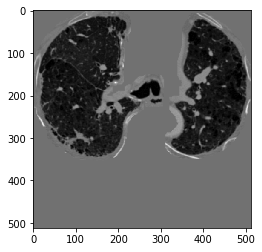

In [14]:
plt.imshow(out_images[13],cmap="gray")

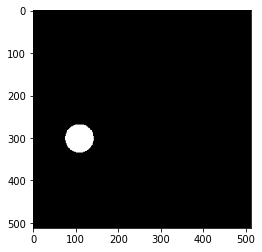

In [15]:
plt.imshow(out_nodemasks[13],cmap="gray")

In [16]:
import sys
print (sys.getsizeof(out_nodemasks))
print (sys.getsizeof(out_images))

3304
3304


In [ ]:
working_path = "/home/atul/major/"

In [ ]:
num_images = len(out_images)
#
#  Writing out images and masks as 1 channel arrays for input into network
#
final_images = np.ndarray([num_images,1,512,512],dtype=np.float32)
final_masks = np.ndarray([num_images,1,512,512],dtype=np.float32)
for i in range(num_images):
    final_images[i,0] = out_images[i]
    final_masks[i,0] = out_nodemasks[i]

rand_i = np.random.choice(range(num_images),size=num_images,replace=False)
test_i = int(0.2*num_images)
np.save(working_path+"trainImages.npy",final_images[rand_i[test_i:]])
np.save(working_path+"trainMasks.npy",final_masks[rand_i[test_i:]])
np.save(working_path+"testImages.npy",final_images[rand_i[:test_i]])
np.save(working_path+"testMasks.npy",final_masks[rand_i[:test_i]])


In [9]:
img=np.load("/home/atul/major/data_process1/lungmask_0279_1094.npy")

In [10]:
img.shape

(3, 512, 512)

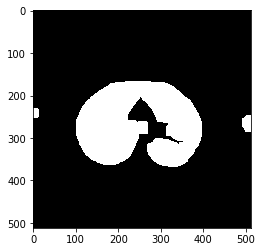

In [13]:
plt.imshow(img[2],cmap="gray")

In [20]:
import cv2

In [23]:
os.chdir("/home/atul/photos/")

In [47]:
os.listdir()

['mid_treated', 'm2', 'c1', 'carious', 'periodontal', 'p2']

In [36]:
from skimage import io

In [56]:
i="carious"
s="home/atul/photos/c1"
for count, j in enumerate(os.listdir(i)):
            path_target=os.path.join(i,j)
            path_target2= "/home/atul/photos/" +path_target
            img=io.imread(path_target,as_grey=True)
            print(img.shape)
            io.imsave("/home/atul/photos/c1/"+j,img)
            print(count)
        #    print(img.shape)

(480, 640)
0
(480, 640)
1
(480, 640)
2
(480, 640)
3
(480, 640)
4
(480, 640)
5
(480, 640)
6
(480, 640)
7
(480, 640)
8
(480, 640)
9
(480, 640)
10


/home/atul/keras_opencv/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(480, 640)
11
(480, 640)
12
(480, 640)
13
(480, 640)
14
(480, 640)
15
(480, 640)
16
(480, 360)
17
(480, 640)
18
(480, 360)
19
(480, 640)
20
(480, 640)
21
(480, 640)
22
(480, 640)
23
(480, 640)
24
(480, 640)
25
(480, 640)
26
(480, 640)
27
(480, 640)
28
(480, 360)
29
(480, 640)
30
(480, 640)
31
(480, 640)
32
(480, 640)
33
(480, 640)
34
(480, 640)
35
(480, 640)
36
(480, 640)
37
(480, 640)
38
(480, 640)
39
(480, 640)
40
(480, 640)
41
(480, 640)
42
(480, 640)
43
(480, 640)
44
(480, 640)
45
(480, 640)
46
(480, 640)
47
(480, 640)
48
(480, 640)
49
(480, 640)
50
(480, 640)
51
(480, 640)
52
(480, 640)
53
(480, 360)
54
(480, 360)
55
(480, 640)
56
(480, 640)
57
(480, 640)
58
(480, 640)
59
(480, 640)
60
(480, 640)
61
(480, 640)
62
(480, 640)
63
(480, 360)
64
(480, 640)
65
(480, 640)
66
(480, 640)
67
(480, 640)
68
(480, 640)
69
(480, 640)
70
(480, 640)
71
(480, 360)
72
(480, 640)
73
(480, 360)
74
(480, 360)
75
(480, 640)
76
(480, 640)
77
(480, 640)
78
(480, 640)
79
(480, 640)
80
(480, 640)
81
(480, 

575
(480, 640)
576
(480, 640)
577
(480, 640)
578
(480, 640)
579
(480, 640)
580
(480, 640)
581
(480, 640)
582
(480, 640)
583
(480, 640)
584
(480, 640)
585
(480, 640)
586
(480, 640)
587
(480, 640)
588
(480, 640)
589
(480, 640)
590
(480, 640)
591
(480, 640)
592
(480, 640)
593
(480, 640)
594
(480, 640)
595
(480, 359)
596
(480, 640)
597
(480, 640)
598
(480, 640)
599
(480, 640)
600
(480, 640)
601
(480, 640)
602
(480, 640)
603
(480, 640)
604
(480, 640)
605
(480, 640)
606
(480, 360)
607
(480, 640)
608
(480, 640)
609
(480, 640)
610
(480, 640)
611
(480, 640)
612
(480, 640)
613
(480, 640)
614
(480, 360)
615
(480, 640)
616
(480, 360)
617
(480, 640)
618
(480, 640)
619
(480, 640)
620
(480, 640)
621
(480, 360)
622
(480, 360)
623
(480, 640)
624
(480, 640)
625
(480, 640)
626
(480, 640)
627
(480, 640)
628
(480, 640)
629
(480, 640)
630
(480, 640)
631
(480, 640)
632
(480, 640)
633
(480, 640)
634
(480, 640)
635
(480, 360)
636
(480, 640)
637
(480, 640)
638
(480, 640)
639
(480, 640)
640
(480, 640)
641
(480, 